In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)

## **1.	Data Cleaning and Preparation:**

In [3]:
#Load the dataset into a data frame or equivalent data structure.
df = pd.read_csv("/content/Cardiotocographic.csv")

In [4]:
df.head(10)

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,73.0,0.5,43.0,2.4,64.000000,0.999926,2.000000
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.000000,17.0,2.1,0.0,10.4,130.000000,0.000000,1.000000
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.000000,16.0,2.1,0.0,13.4,130.000000,0.000000,1.000000
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.000000,16.0,2.4,0.0,23.0,117.000000,1.000000,1.000000
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.000000,16.0,2.4,0.0,19.9,117.000000,1.000000,1.000000
5,134.000000,0.001116,0.0,0.010493,0.009444,0.0,0.002099,26.0,5.9,0.0,0.0,150.000000,0.000000,3.000000
6,134.000000,0.001403,0.0,0.012623,0.008415,0.0,0.002805,29.0,6.3,0.0,0.0,150.000000,0.000000,-1.025988
7,122.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,83.0,0.5,6.0,15.6,69.920261,1.000000,3.000000
8,122.000000,0.038567,0.0,0.001517,0.000000,0.0,0.000000,84.0,0.5,5.0,13.6,68.000000,1.000000,3.000000
9,122.000000,0.000000,0.0,0.002967,0.000000,0.0,0.000000,86.0,0.3,6.0,10.6,68.000000,1.000000,3.000000


In [5]:
#Handle missing values appropriately (e.g., imputation, deletion).
df.isna().sum()

,0
LB,21
AC,20
FM,0
UC,0
DL,0
DS,21
DP,21
ASTV,0
MSTV,0
ALTV,0


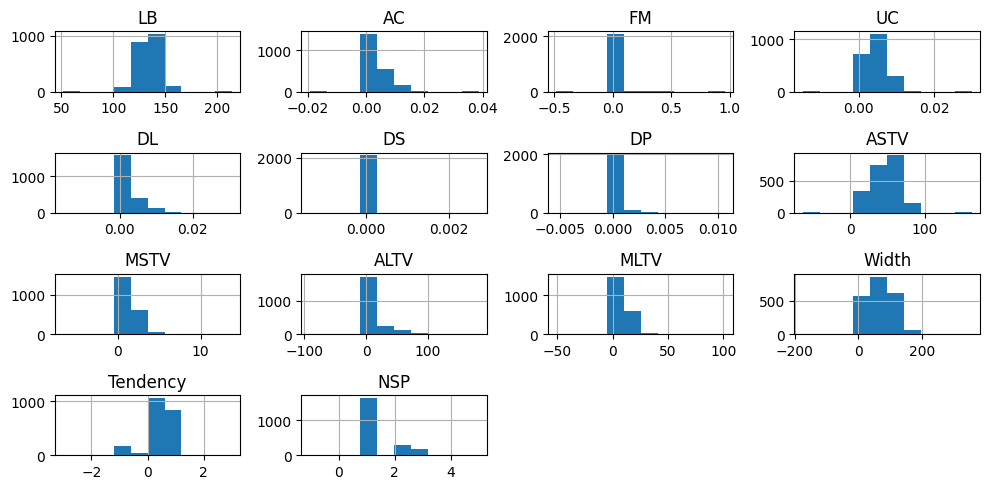

In [6]:
df.hist()
plt.tight_layout()

In [7]:
df.fillna({'LB':df['LB'].median()}, inplace=True) #filling missing value in LB by Median as outliers are present.

In [8]:
df.isna().sum()

,0
LB,0
AC,20
FM,0
UC,0
DL,0
DS,21
DP,21
ASTV,0
MSTV,0
ALTV,0


In [9]:
df.fillna({'AC':df['AC'].median()}, inplace=True) #filling missing value in AC by Median as outliers are present.

In [10]:
df.fillna({'DS':df['DS'].median()}, inplace=True) #filling missing value in LDS by Median as outliers are present.

In [11]:
df.fillna({'DP':df['DP'].median()}, inplace=True) #filling missing value in DP by Median as outliers are present.

In [12]:
df.fillna({'MLTV':df['MLTV'].median()}, inplace=True) #filling missing value in MLTV by Median as outliers are present.

In [13]:
df.fillna({'Width':df['Width'].median()}, inplace=True) #filling missing value in Width by Median as outliers are present.

In [14]:
df.fillna({'Tendency':df['Tendency'].mode()[0]}, inplace=True) #filling missing value in Tendency by Mode as it is categorical column.

In [15]:
df.fillna({'NSP':df['NSP'].mode()[0]}, inplace=True) #filling missing value in NSP by Mode as it is categorical column.

In [16]:
df.isna().sum()

,0
LB,0
AC,0
FM,0
UC,0
DL,0
DS,0
DP,0
ASTV,0
MSTV,0
ALTV,0


In [17]:
#Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   float64
 1   AC        2126 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2126 non-null   float64
 6   DP        2126 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2126 non-null   float64
 11  Width     2126 non-null   float64
 12  Tendency  2126 non-null   float64
 13  NSP       2126 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


There is no datatype inconsistency, all the column is numeric datatype.

<Axes: >

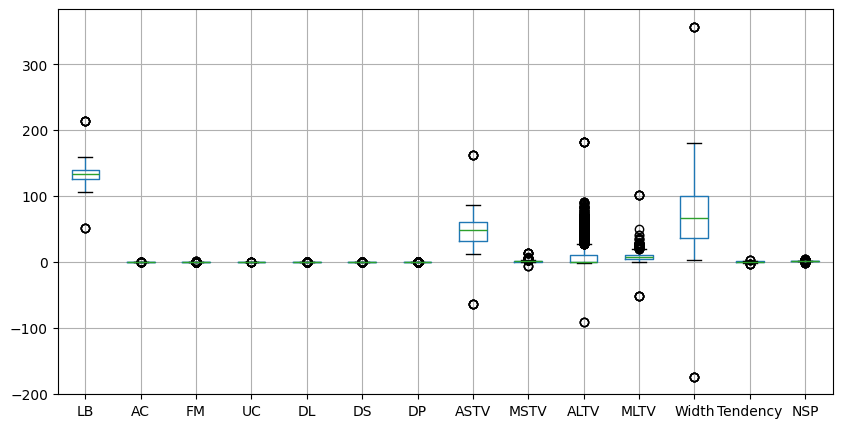

In [18]:
#Detect and treat outliers if necessary.
df.boxplot()

In [19]:
# Outlier Detection:
def outlier_detection(data,colname):
  q1 = data[colname].quantile(0.25)
  q3 = data[colname].quantile(0.75)
  iqr = q3 - q1

  upper_extreme = q3 + (1.5 * iqr)
  lower_extreme = q1 - (1.5 * iqr)

  return lower_extreme, upper_extreme,q1,q3

In [20]:
#Treating outlier for LB column:
outlier_detection(df,'LB')

(np.float64(105.0), np.float64(161.0), np.float64(126.0), np.float64(140.0))

In [21]:
df[df['LB']>161]

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
411,214.0,0.000000,0.000000,0.001595,0.001595,0.000000,0.0,71.000000,0.300000,17.0,5.8,15.0,0.0,2.0000
610,214.0,0.002469,0.002469,0.002469,0.000000,0.000004,0.0,35.000000,1.798149,0.0,24.7,118.0,1.0,1.0000
612,214.0,0.005181,0.012953,0.002591,0.000000,0.000000,0.0,39.442226,1.600000,0.0,10.0,136.0,0.0,0.9912
1103,214.0,0.006972,0.000000,0.002960,0.000000,0.000000,0.0,19.000000,2.300000,0.0,12.1,53.0,0.0,1.0000
1406,214.0,0.005068,0.000000,0.001689,0.000000,0.000000,0.0,46.000000,0.800000,0.0,8.6,67.0,1.0,1.0000
1504,214.0,0.006189,0.000000,0.006189,0.000000,0.000000,0.0,38.000000,1.000000,0.0,8.1,53.0,0.0,1.0000


In [22]:
df.loc[df['LB']>161.0,'LB'] = 161.0

In [23]:
df[df['LB']<105]

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
134,52.000000,0.001590,0.000000,0.029851,0.000000,0.000000,0.000003,58.0,0.5,0.0,7.9,44.00000,1.0,1.0
785,52.000000,0.000834,0.013344,0.000000,0.000000,0.000000,0.000000,53.0,0.7,8.0,12.0,77.00000,1.0,1.0
1027,51.842487,0.009485,0.000000,0.005420,0.002710,0.000005,0.000000,-63.0,2.5,0.0,3.9,98.00000,0.0,1.0
1834,52.188547,0.000000,0.001043,0.003128,0.007299,0.000000,0.000000,61.0,1.4,0.0,10.0,105.40169,1.0,1.0


In [24]:
df.loc[df['LB']<105.0,'LB'] = 105.0

<Axes: xlabel='LB'>

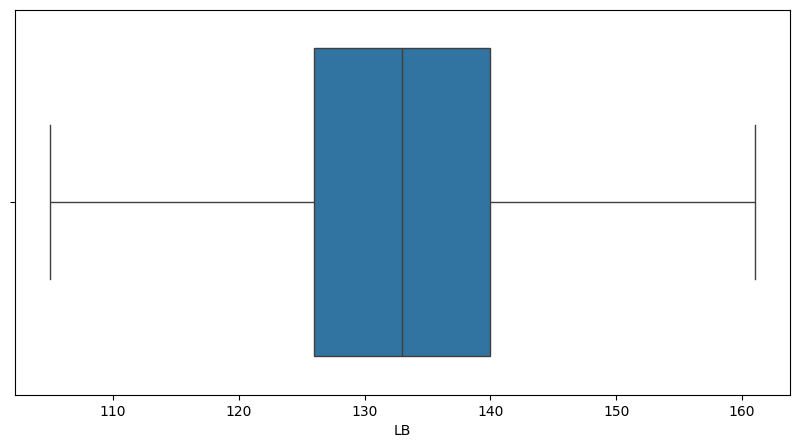

In [25]:
sns.boxplot(x = df['LB'])

In [26]:
#Treating outlier for AC column
outlier_detection(df,'AC')

(np.float64(-0.00840919125),
 np.float64(0.01401531875),
 np.float64(0.0),
 np.float64(0.0056061275))

In [27]:
df[df['AC']<-0.00840919125]

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
23,128.0,-0.019284,0.000000,0.000000,0.000000,0.0,0.000000,80.000000,0.5,0.0,6.8,16.0,1.00000,3.000000
157,123.0,-0.019284,0.000000,0.006400,0.000000,0.0,0.000000,37.927549,0.9,13.0,8.0,24.0,0.00000,1.000000
681,140.0,-0.019284,0.003191,0.004255,0.000000,0.0,0.000000,34.000000,2.9,0.0,40.8,114.0,1.00000,0.984834
1752,134.0,-0.019284,0.001096,0.001096,0.003289,0.0,0.003289,61.000000,1.8,0.0,0.0,118.0,-1.00594,3.000000


In [28]:
df.loc[df['AC']<-0.00840919125,'AC'] = -0.00840919125

In [29]:
df[df['AC']>0.01401531875].shape[0]

39

In [30]:
df.loc[df['AC']>0.01401531875,'AC'] = 0.01401531875

<Axes: xlabel='AC'>

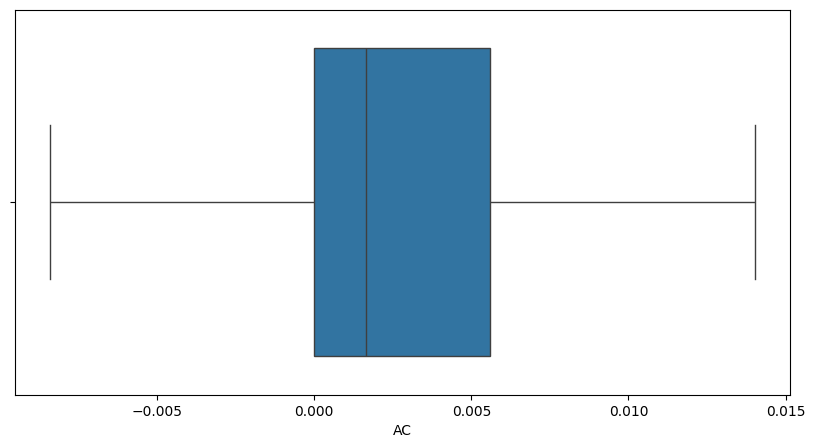

In [31]:
sns.boxplot(x = df['AC'])

In [32]:
#Treating outlier for FM Column:
outlier_detection(df,'FM')

(np.float64(-0.003849856875),
 np.float64(0.006416428125),
 np.float64(0.0),
 np.float64(0.00256657125))

In [33]:
df[df['FM']<-0.003849856875]

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
229,123.000000,0.002502,-0.480634,0.000000,0.000000,0.000000,0.0,52.0,0.8,1.517448,15.400000,90.0,1.0,1.000000
586,120.000000,0.000000,-0.480634,0.005510,0.000000,0.000000,0.0,40.0,1.1,0.000000,14.000000,29.0,0.0,1.000000
976,131.000000,0.002275,-0.480634,0.004551,0.004551,0.000000,0.0,42.0,1.0,11.000000,4.490281,102.0,1.0,1.018217
996,129.000000,0.006148,-0.480634,0.004098,0.001025,0.000000,0.0,25.0,1.5,0.000000,11.300000,59.0,0.0,1.000000
1738,134.000000,0.006121,-0.480634,0.006886,0.003826,-0.001353,0.0,62.0,1.1,0.000000,4.900000,83.0,1.0,1.000000
1763,119.965669,0.000000,-0.480634,0.004425,0.011799,0.000000,0.0,59.0,1.6,0.000000,11.097764,83.0,0.0,3.000000
1806,143.000000,0.000000,-0.005106,0.001030,0.000000,0.000000,0.0,68.0,0.3,6.000000,9.600000,27.0,0.0,1.000000


In [34]:
df.loc[df['FM']<-0.003849856875,'FM'] = -0.003849856875

In [35]:
df[df['FM']>0.006416428125].shape[0]

340

In [36]:
df.loc[df['FM']>0.006416428125,'FM'] = 0.006416428125

<Axes: xlabel='FM'>

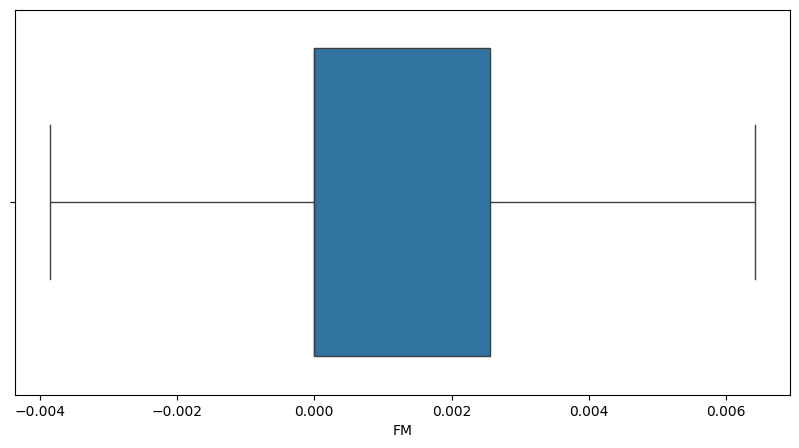

In [37]:
sns.boxplot(x = df['FM'])

In [38]:
#Treating outlier for UC Column:

In [39]:
outlier_detection(df,'UC')

(np.float64(-0.005177445124999999),
 np.float64(0.013563983874999998),
 np.float64(0.00185059075),
 np.float64(0.006535948))

In [40]:
df[df['UC']<-0.005177445124999999]

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
793,146.0,0.000388,0.0,-0.014925,0.001940,0.0,0.0,52.0,0.8,32.0,8.6,72.0,1.0,1.0
1396,142.0,0.000872,0.0,-0.014925,0.004359,0.0,0.0,49.0,0.9,28.0,5.8,114.0,1.0,1.0
1469,148.0,0.003633,0.0,-0.014925,0.000000,0.0,0.0,36.0,0.8,8.0,9.4,45.0,0.0,1.0
1868,138.0,0.007143,0.0,-0.014925,0.003571,0.0,0.0,49.0,1.6,0.0,6.0,92.0,1.0,1.0


In [41]:
df.loc[df['UC']<-0.005177445124999999,'UC'] = -0.005177445124999999

In [42]:
df[df['UC']>0.013563983874999998].shape[0]

9

In [43]:
df.loc[df['UC']>0.013563983874999998,'UC'] = 0.013563983874999998

<Axes: xlabel='UC'>

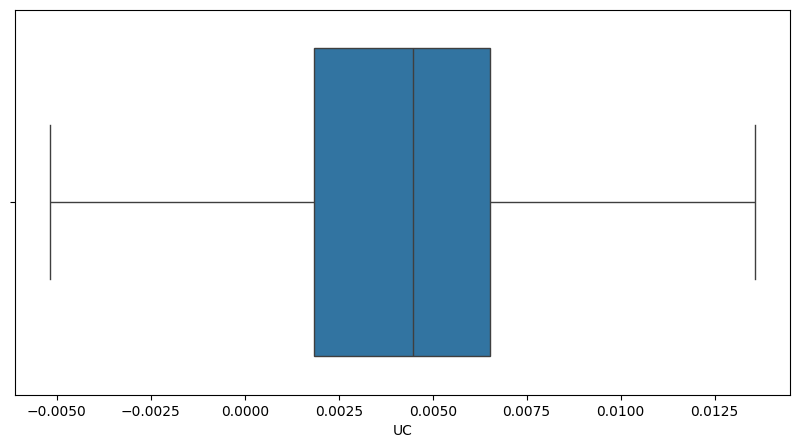

In [44]:
sns.boxplot(x = df['UC'])

In [45]:
#Treating outlier for DL Column:

In [46]:
outlier_detection(df,'DL')

(np.float64(-0.004934211),
 np.float64(0.008223685),
 np.float64(0.0),
 np.float64(0.003289474))

In [47]:
df[df['DL']<-0.004934211]

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
894,144.331585,0.000000,0.000000,0.006757,-0.015385,0.0,0.000000,36.0,0.8,2.0,10.4,27.0,0.000000,1.0
967,133.000000,0.005000,0.000000,0.003333,-0.015385,0.0,0.000000,27.0,1.7,0.0,20.4,89.0,1.000000,1.0
1035,125.000000,0.000000,0.000000,0.004040,-0.015385,0.0,0.000000,32.0,1.0,15.0,6.0,33.0,0.988564,1.0
1218,135.000000,0.000000,0.000000,0.006867,-0.015393,0.0,0.000000,54.0,0.5,12.0,9.0,32.0,1.000000,1.0
1496,132.000000,0.006124,-0.000767,0.009624,-0.015385,0.0,0.000000,32.0,1.2,0.0,13.5,72.0,1.000000,5.0
1963,133.000000,0.000000,0.000000,0.009946,-0.015385,0.0,0.002281,61.0,2.8,0.0,0.0,98.0,0.000000,3.0


In [48]:
df.loc[df['DL']<-0.004934211,'DL'] = -0.004934211

In [49]:
df[df['DL']>0.008223685].shape[0]

119

In [50]:
df.loc[df['DL']>0.008223685,'DL'] = 0.008223685

<Axes: xlabel='DL'>

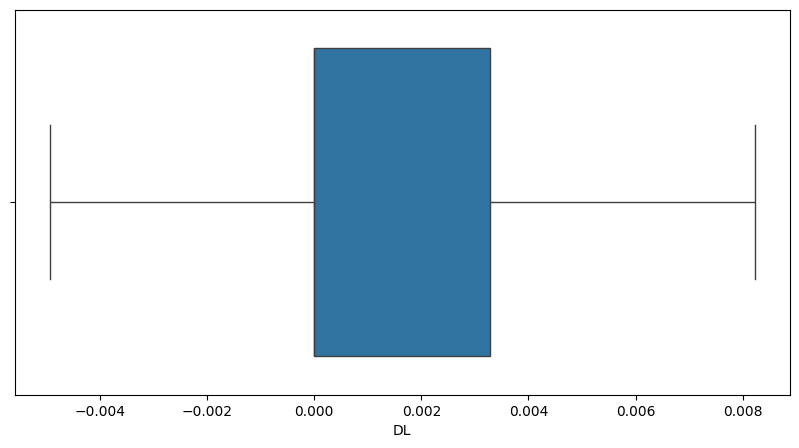

In [51]:
sns.boxplot(x = df['DL'])

In [52]:
#Treating outlier for DS Column:

In [53]:
outlier_detection(df,'DS')

(np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0))

In [54]:
df[df['DS']<0.0].shape[0]

53

In [55]:
df.loc[df['DS']<0.0,'DS'] = 0.0

In [56]:
df[df['DS']>0.0].shape[0]

67

In [57]:
df.loc[df['DS']>0.0,'DS'] = 0.0

<Axes: xlabel='DS'>

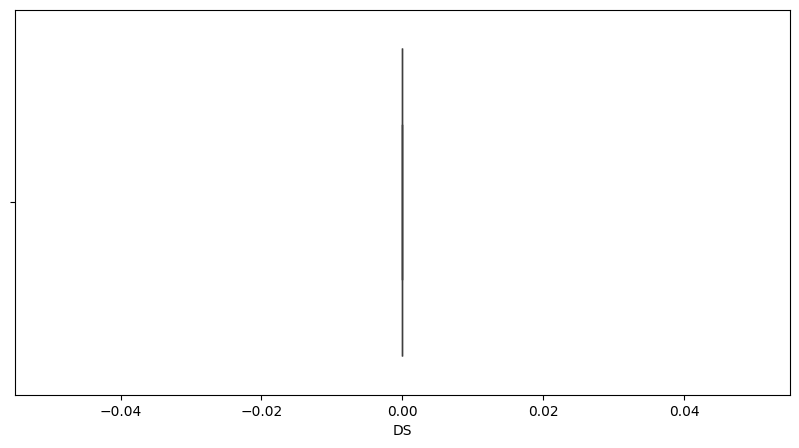

In [58]:
sns.boxplot(x = df['DS'])

In [59]:
#Treating outlier for DP Column:

In [60]:
outlier_detection(df,'DP')

(np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0))

In [61]:
df[df['DP']<0.0].shape[0]

52

In [62]:
df.loc[df['DP']<0.0,'DP'] = 0.0

In [63]:
df[df['DP']>0.0].shape[0]

232

In [64]:
df.loc[df['DP']>0.0,'DP'] = 0.0

<Axes: xlabel='DP'>

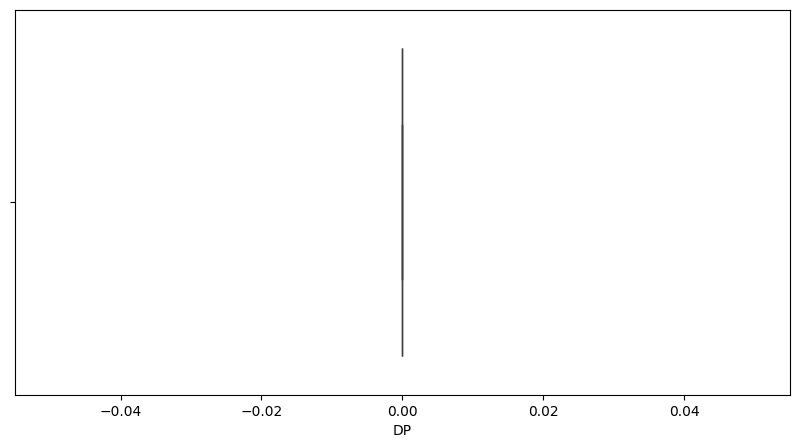

In [65]:
sns.boxplot(x = df['DP'])

In [66]:
#Treating outlier for ASTV Column:

In [67]:
outlier_detection(df,'ASTV')

(np.float64(-11.5), np.float64(104.5), np.float64(32.0), np.float64(61.0))

In [68]:
df[df['ASTV']<-11.5]

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
131,158.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,-63.0,0.6,31.0,8.6,92.0,1.0,1.0
504,128.0,0.008253,0.006416,0.004127,0.000000,0.0,0.0,-63.0,1.1,0.0,12.7,123.0,0.0,1.0
1027,105.0,0.009485,0.000000,0.005420,0.002710,0.0,0.0,-63.0,2.5,0.0,3.9,98.0,0.0,1.0
1195,138.0,0.011752,0.000000,0.005342,0.000000,0.0,0.0,-63.0,1.2,0.0,4.1,48.0,0.0,1.0
1578,132.0,0.000000,-0.002889,0.002994,0.000074,0.0,0.0,-63.0,1.1,0.0,13.7,52.0,1.0,1.0


In [69]:
df.loc[df['ASTV']<-11.5,'ASTV'] = -11.5

In [70]:
df[df['ASTV']>104.5]

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
232,123.0,0.003650,0.005474,0.000000,0.000000,0.0,0.0,162.0,0.7,0.0,8.600000,71.000000,1.0,0.98342
345,139.0,-0.000007,0.006416,0.000000,0.000000,0.0,0.0,162.0,0.2,59.0,4.200000,11.000000,0.0,2.00000
1014,139.0,0.006312,0.000000,0.004509,0.000000,0.0,0.0,162.0,0.8,0.0,7.600000,33.913652,-1.0,1.00000
1941,133.0,0.000000,0.003562,0.006233,0.003562,0.0,0.0,162.0,2.1,0.0,1.527002,98.000000,0.0,1.00000
2008,125.0,0.001196,0.001196,0.008373,0.008224,0.0,0.0,162.0,1.1,0.0,4.100000,100.000000,0.0,1.00000


In [71]:
df.loc[df['ASTV']>104.5,'ASTV'] = 104.5

<Axes: xlabel='ASTV'>

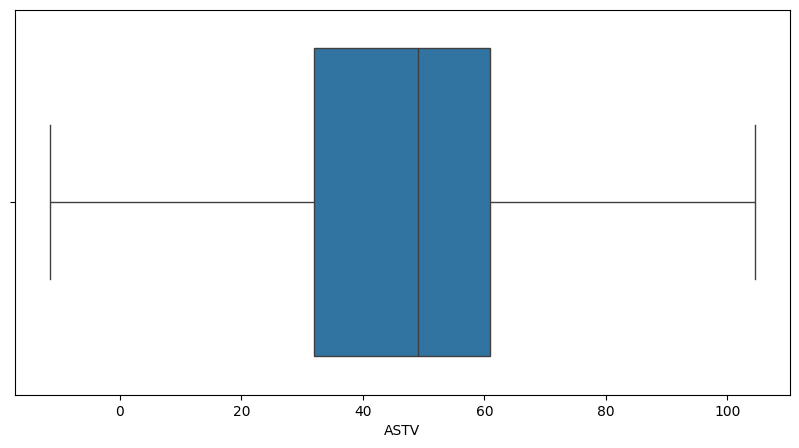

In [72]:
sns.boxplot(x = df['ASTV'])

In [73]:
#Treating outlier for MLTV Column:

In [74]:
outlier_detection(df,'MLTV')

(np.float64(-4.700000000000001),
 np.float64(20.1),
 np.float64(4.6),
 np.float64(10.8))

In [75]:
df[df['MLTV']<-4.700000000000001]

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
381,129.0,0.009174,0.006416,0.002502,0.000000,0.0,0.0,41.0,1.1,0.0,-50.7,135.0,0.0,-1.0
1417,142.0,0.002016,0.000000,0.008065,0.000000,0.0,0.0,48.0,0.7,0.0,-50.7,39.0,0.0,1.0
1682,110.0,0.004444,0.000000,0.008889,0.006667,0.0,0.0,68.0,3.0,0.0,-50.7,133.0,-1.0,3.0
1800,143.0,0.000000,0.000000,0.003717,0.000000,0.0,0.0,66.0,0.4,5.0,-50.7,24.0,0.0,1.0
2033,129.0,0.000000,0.001122,0.006734,0.005767,0.0,0.0,67.0,3.2,0.0,-50.7,80.0,0.0,3.0


In [76]:
df.loc[df['MLTV']<-4.700000000000001,'MLTV'] = -4.700000000000001

In [77]:
df[df['MLTV']>20.1].shape[0]

76

In [78]:
df.loc[df['MLTV']>20.1,'MLTV'] = 20.1

<Axes: xlabel='MLTV'>

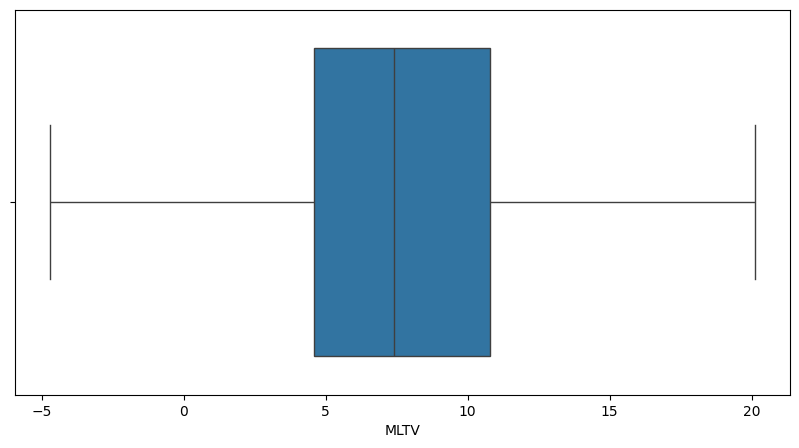

In [79]:
sns.boxplot(x = df['MLTV'])

In [80]:
#Treating outlier for ALTV Column:

In [81]:
outlier_detection(df,'ALTV')

(np.float64(-16.5), np.float64(27.5), np.float64(0.0), np.float64(11.0))

In [82]:
df[df['ALTV']<-16.5]

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
802,146.507943,0.000000,0.0,0.006369,0.000000,0.0,0.0,65.0,0.4,-91.0,7.4,30.0,0.0,1.998602
1068,133.000000,0.009579,0.0,0.005747,0.000000,0.0,0.0,33.0,1.2,-91.0,4.4,82.0,1.0,1.000000
1105,122.000000,0.002799,0.0,0.001866,0.000933,0.0,0.0,19.0,2.0,-91.0,17.7,46.0,0.0,1.000000


In [83]:
df.loc[df['ALTV']<-16.5,'ALTV'] = -16.5

In [84]:
df[df['ALTV']>27.5].shape[0]

315

In [85]:
df.loc[df['ALTV']>27.5,'ALTV'] = 27.5

<Axes: xlabel='ALTV'>

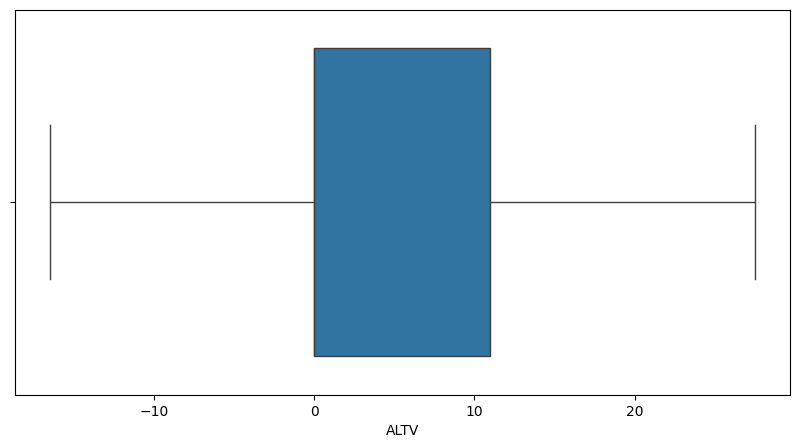

In [86]:
sns.boxplot(x = df['ALTV'])

In [87]:
#Treating outlier for MSTV Column:

In [88]:
outlier_detection(df,'MSTV')

(np.float64(-0.8), np.float64(3.2), np.float64(0.7), np.float64(1.7))

In [89]:
df[df['MSTV']<-0.8]

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
692,133.0,0.007740,0.006416,0.004644,0.004644,0.0,0.0,24.000000,-6.6,0.0,13.4,124.994353,-3.0,1.0
779,128.0,-0.000056,0.004170,0.000026,0.000000,0.0,0.0,73.034408,-6.6,27.5,7.3,22.000000,0.0,2.0
789,123.0,0.004435,0.006416,0.000000,0.000000,0.0,0.0,56.000000,-6.6,0.0,7.4,71.000000,1.0,1.0


In [90]:
df.loc[df['MSTV']<-0.8,'MSTV'] = -0.8

In [91]:
df[df['MSTV']>3.2].shape[0]

77

In [92]:
df.loc[df['MSTV']>3.2,'MSTV'] =3.2

<Axes: xlabel='MSTV'>

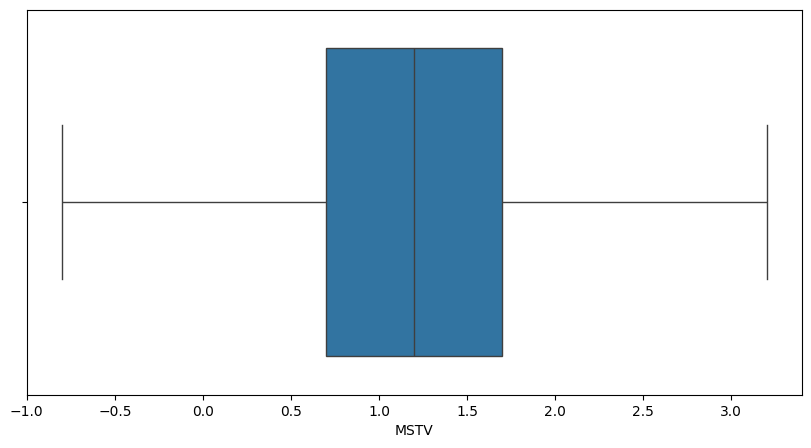

In [93]:
sns.boxplot(x = df['MSTV'])

In [94]:
#Treating outlier for Width Column:

In [95]:
outlier_detection(df,'Width')

(np.float64(-57.5), np.float64(194.5), np.float64(37.0), np.float64(100.0))

In [96]:
df[df['Width']<-57.5]

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
54,147.816574,0.000000,0.002502,0.000000,-0.000059,0.0,0.0,70.0,0.3,27.5,5.1,-174.0,1.0,3.004535
64,141.000000,0.001282,0.000000,0.005128,0.000000,0.0,0.0,25.0,1.5,0.0,13.4,-174.0,1.0,1.000000
860,142.000000,0.001471,0.001542,0.004412,0.000000,0.0,0.0,39.0,0.9,0.0,12.0,-174.0,1.0,1.000000
1273,115.000000,0.007032,0.000000,0.005626,0.000000,0.0,0.0,20.0,1.6,0.0,9.4,-174.0,0.0,1.000000
1320,128.000000,0.006519,0.006416,0.005215,0.005215,0.0,0.0,19.0,2.4,0.0,1.9,-174.0,0.0,1.000000


In [97]:
df.loc[df['Width']<-57.5,'Width'] = -57.5

In [98]:
df[df['Width']>194.5]

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
120,123.000000,0.000000,0.000000,0.005004,0.004170,0.0,0.0,47.0,1.1,27.5,7.4,357.0,0.0,0.997921
389,129.000000,0.008264,0.006416,0.002066,0.000000,0.0,0.0,37.0,1.3,0.0,12.1,357.0,0.0,1.000000
704,130.030418,0.000000,0.006416,0.000000,0.000000,0.0,0.0,80.0,0.3,0.0,0.0,357.0,-1.0,3.000000
829,152.000000,0.000000,0.000000,0.003854,0.000963,0.0,0.0,58.0,0.5,27.5,7.5,357.0,1.0,1.000000
1096,123.000000,0.014015,0.000000,0.001927,0.000000,0.0,0.0,24.0,2.2,0.0,1.7,357.0,0.0,1.000000


In [99]:
df.loc[df['Width']>194.5,'Width'] = 194.5

<Axes: xlabel='Width'>

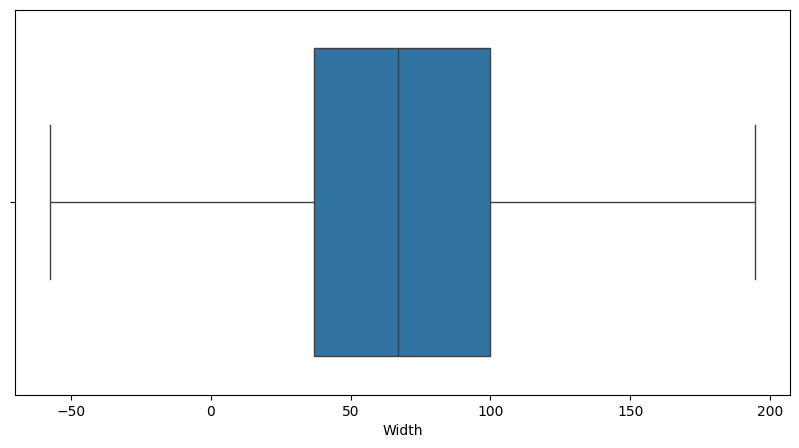

In [100]:
sns.boxplot(x = df['Width'])

In [101]:
#Treating outlier for Tendency Column:

In [102]:
outlier_detection(df,'Tendency')

(np.float64(-1.5), np.float64(2.5), np.float64(0.0), np.float64(1.0))

In [103]:
df[df['Tendency']<-1.5]

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
449,135.0,0.001233,0.002466,0.000000,0.000000,0.0,0.0,58.000000,0.6,15.0,8.0,95.000000,-3.000000,1.0
692,133.0,0.007740,0.006416,0.004644,0.004644,0.0,0.0,24.000000,-0.8,0.0,13.4,124.994353,-3.000000,1.0
952,136.0,0.009506,0.000000,0.005703,0.002852,0.0,0.0,34.893135,1.2,0.0,7.6,94.000000,-2.996314,1.0
1098,122.0,0.000000,-0.000064,0.002516,0.000067,0.0,0.0,22.000000,1.8,2.0,15.7,35.308659,-3.000000,1.0
1318,125.0,0.002062,0.006416,0.006186,0.008224,0.0,0.0,18.000000,2.7,0.0,6.3,125.000000,-3.000000,1.0
2088,133.0,0.000000,0.001236,0.006180,0.000000,0.0,0.0,79.000000,0.5,27.5,3.1,10.000000,-3.000000,1.0


In [104]:
df.loc[df['Tendency']<-1.5,'Tendency'] = -1.5

In [105]:
df[df['Tendency']>2.5]

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
1039,125.0,0.000000,0.0,0.005217,0.000000,0.0,0.0,38.0,0.8,18.0,6.564057,25.0,3.0,1.0
1392,142.0,0.000000,0.0,0.007463,0.000000,0.0,0.0,60.0,0.4,17.0,6.800000,21.0,3.0,2.0
1595,134.0,0.000000,0.0,0.005181,0.007772,0.0,0.0,22.0,2.1,0.0,8.053303,111.0,3.0,1.0
1856,138.0,0.013713,0.0,0.004219,0.000000,0.0,0.0,51.0,1.1,0.0,2.100000,49.0,3.0,1.0


In [106]:
df.loc[df['Tendency']>2.5,'Tendency'] = 2.5

<Axes: xlabel='Tendency'>

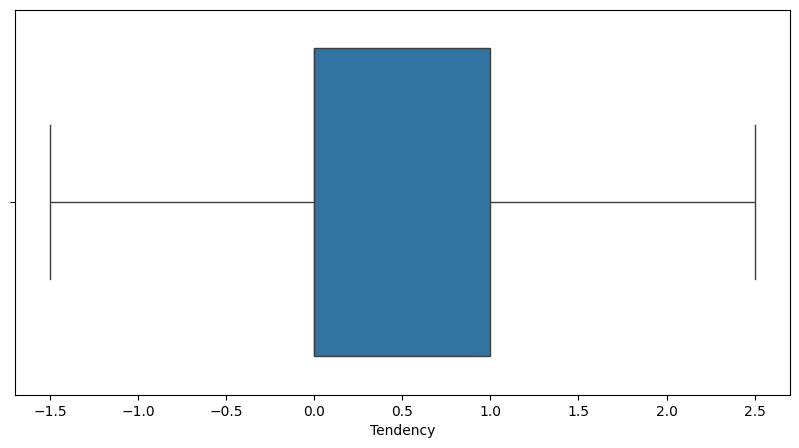

In [107]:
sns.boxplot(x = df['Tendency'])

In [108]:
#Treating outlier for NSP Column:

In [109]:
outlier_detection(df,'NSP')

(np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0))

In [110]:
df[df['NSP']<1.0].shape[0]

50

In [111]:
df.loc[df['NSP']<1.0,'NSP'] = 1.0

In [112]:
df[df['NSP']>1.0].shape[0]

509

In [113]:
df.loc[df['NSP']>1.0,'NSP'] = 1.0

<Axes: xlabel='NSP'>

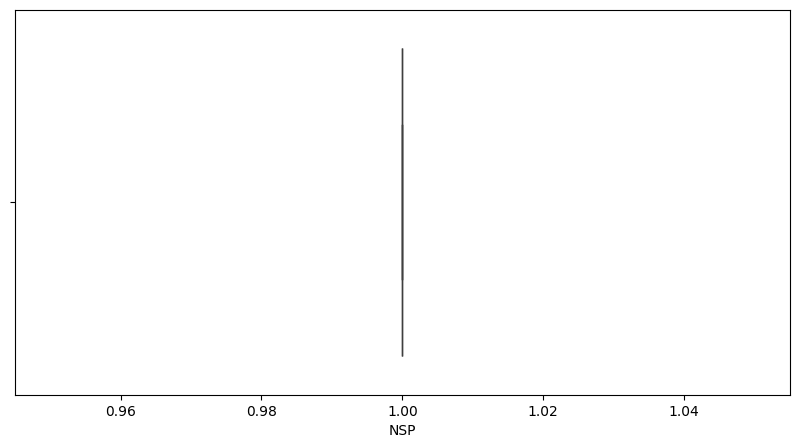

In [114]:
sns.boxplot(x = df['NSP'])

<Axes: >

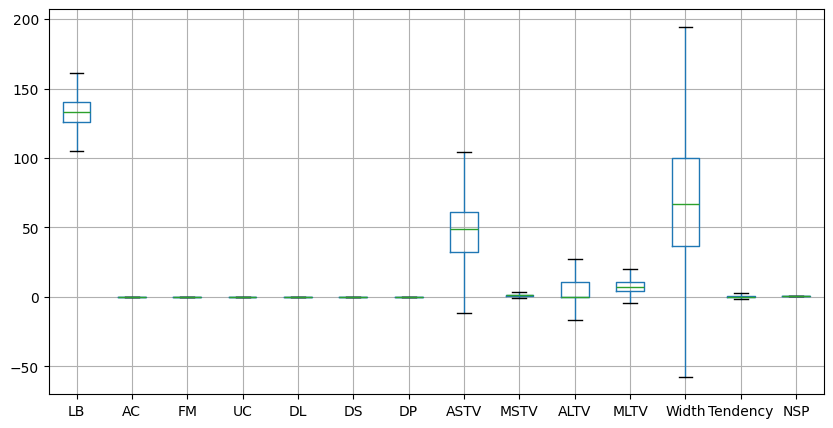

In [115]:
df.boxplot()

## **2.	Statistical Summary:**

In [116]:
#Provide a statistical summary for each variable in the dataset, including measures of central tendency (mean, median)
# and dispersion (standard deviation, interquartile range).
mean = df.mean()
median = df.median()
std = df.std()
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3 - q1

In [117]:
pd.DataFrame([mean,median,std,IQR],index=['Mean','Median','Standard_deviation',"IQR"])

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
Mean,133.290331,0.003132,0.001568,0.004362,0.001770,0.0,0.0,46.981873,1.304644,6.691678,8.007471,70.287203,0.316537,1.0
Median,133.000000,0.001634,0.000000,0.004484,0.000000,0.0,0.0,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.0
Standard_deviation,9.930268,0.003828,0.002485,0.003001,0.002668,0.0,0.0,17.612745,0.781091,10.378400,5.047078,39.571995,0.622406,0.0
IQR,14.000000,0.005606,0.002567,0.004685,0.003289,0.0,0.0,29.000000,1.000000,11.000000,6.200000,63.000000,1.000000,0.0


In [118]:
#Highlight any interesting findings from this summary.



*   LB and UC Mean and median are almost the same so data is balanced and consistent.
*   AC, FM, and DL have mean > median , their data is right-skewed with some higher values.
*   ASTV and MSTV: Show moderate variation, meaning their values fluctuate more than others.
*   MLTV: Moderate spread but mostly stable.
*   ALTV, Width, and Tendency still contain slight irregularities because of natural data spread.
*   DS, DP, NSP: Have no variation, these columns are constant as std and IQR are 0.



## **3.	Data Visualization:**

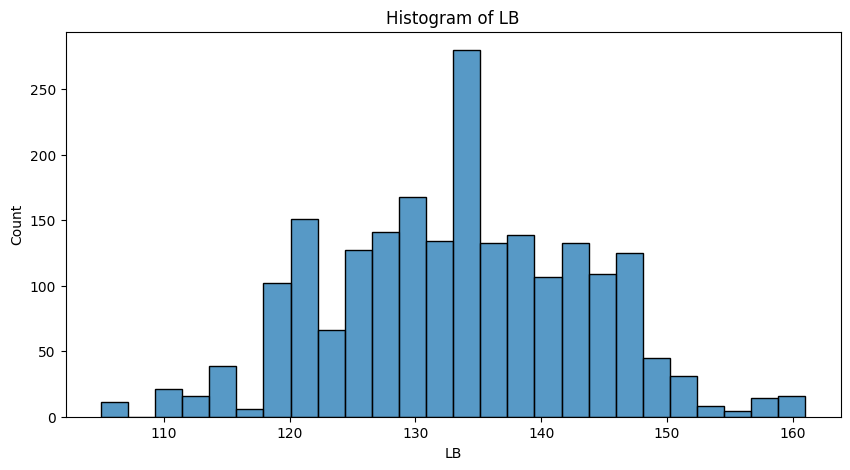

In [119]:
#Create histograms or boxplots to visualize the distributions of various numerical variables.
sns.histplot(df['LB'])
plt.title("Histogram of LB")
plt.show()

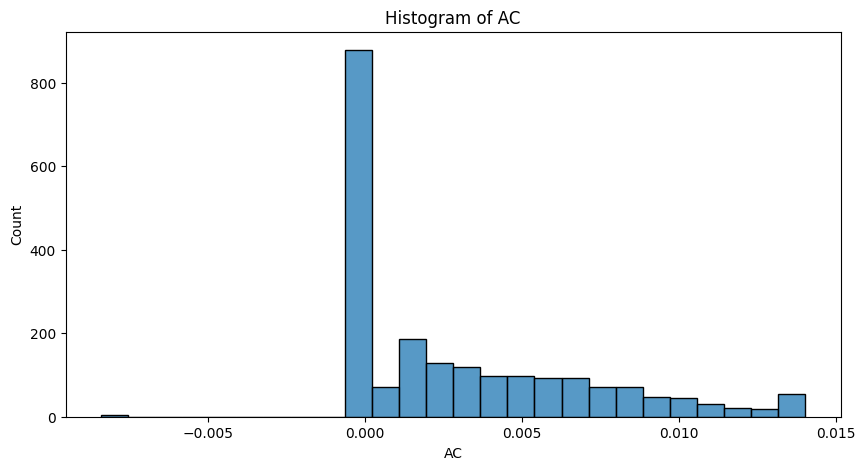

In [120]:
sns.histplot(df['AC'])
plt.title("Histogram of AC")
plt.show()

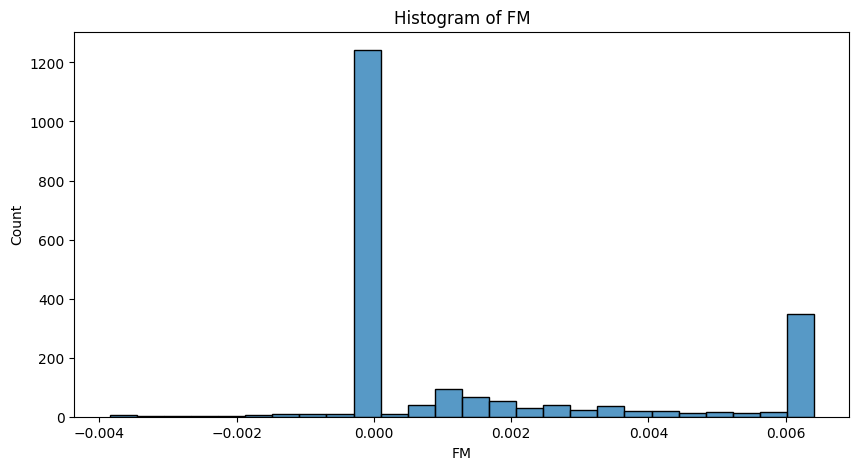

In [121]:
sns.histplot(df['FM'])
plt.title("Histogram of FM")
plt.show()

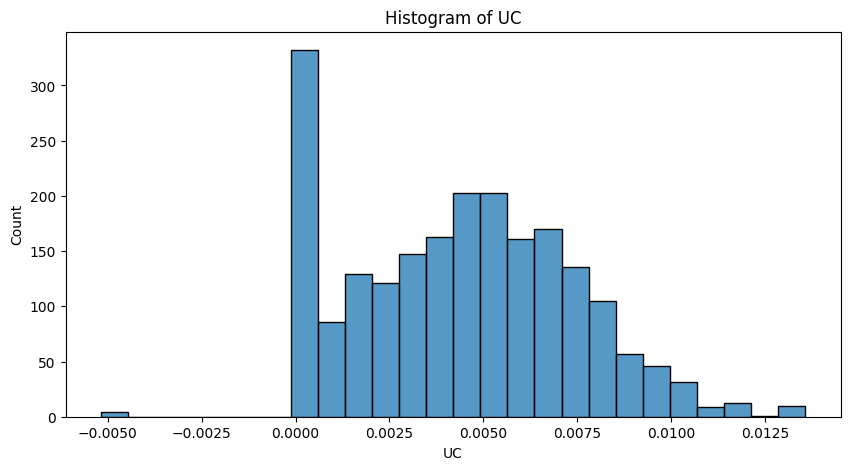

In [122]:
sns.histplot(df['UC'])
plt.title("Histogram of UC")
plt.show()

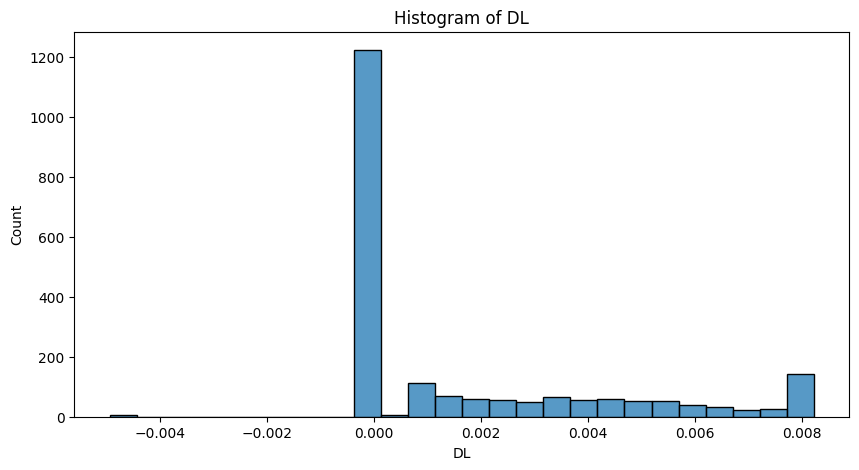

In [123]:
sns.histplot(df['DL'])
plt.title("Histogram of DL")
plt.show()

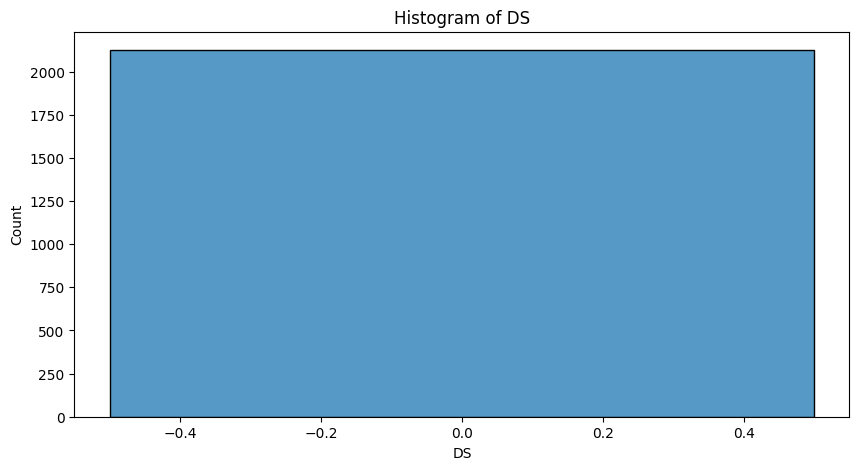

In [124]:
sns.histplot(df['DS'])
plt.title("Histogram of DS")
plt.show()

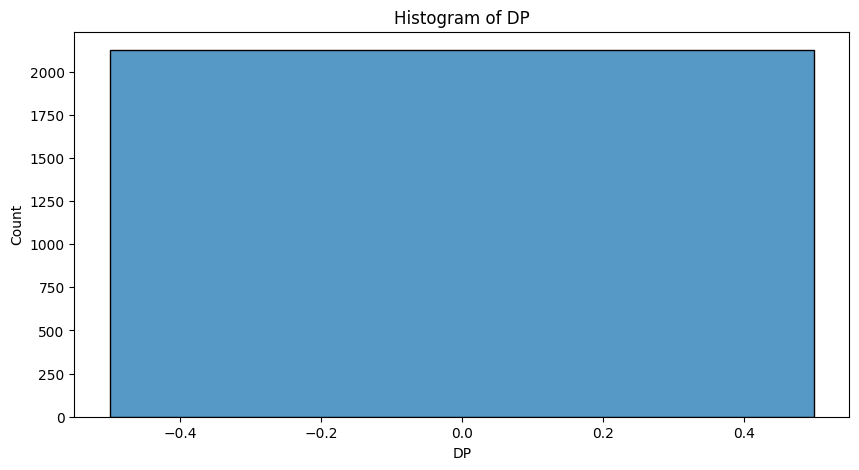

In [125]:
sns.histplot(df['DP'])
plt.title("Histogram of DP")
plt.show()

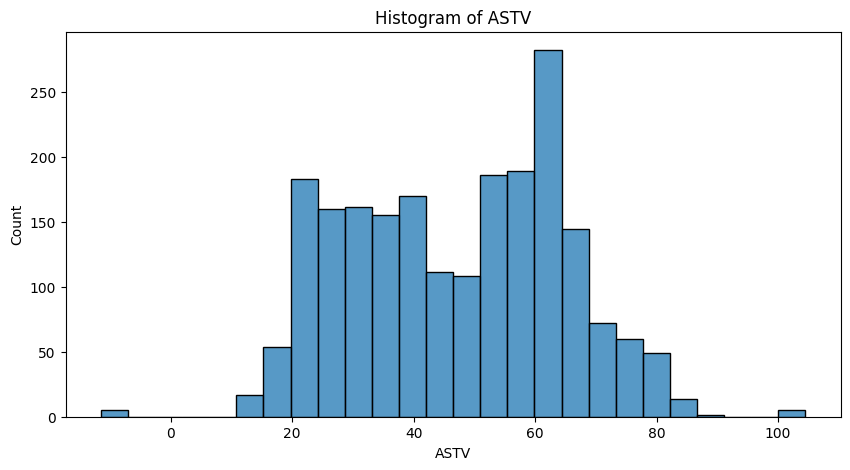

In [126]:
sns.histplot(df['ASTV'])
plt.title("Histogram of ASTV")
plt.show()

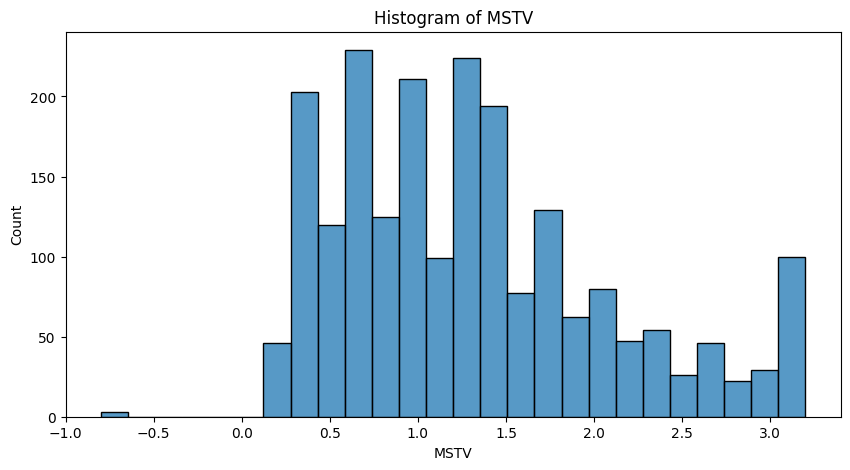

In [127]:
sns.histplot(df['MSTV'])
plt.title("Histogram of MSTV")
plt.show()

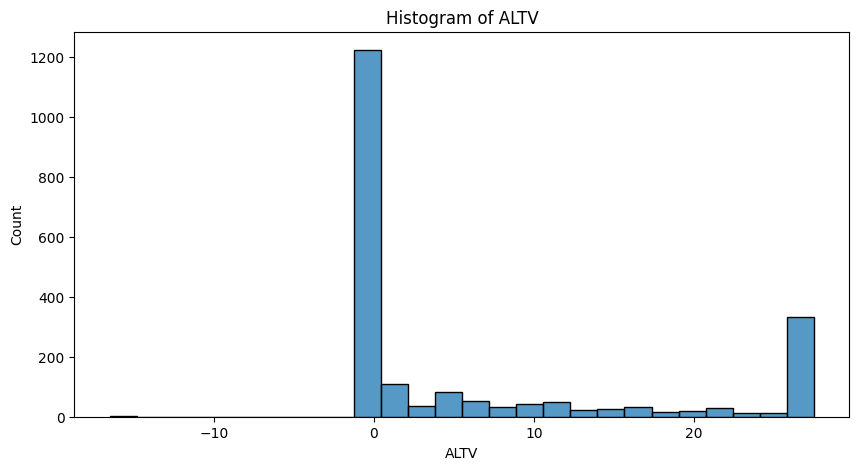

In [128]:
sns.histplot(df['ALTV'])
plt.title("Histogram of ALTV")
plt.show()

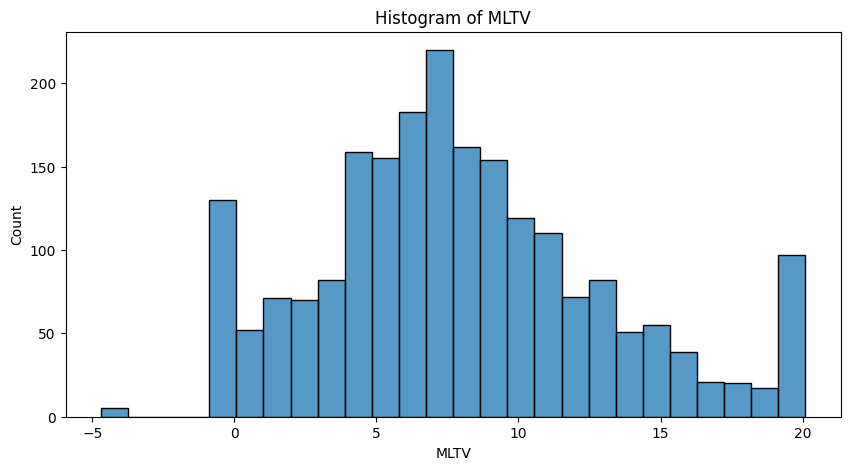

In [129]:
sns.histplot(df['MLTV'])
plt.title("Histogram of MLTV")
plt.show()

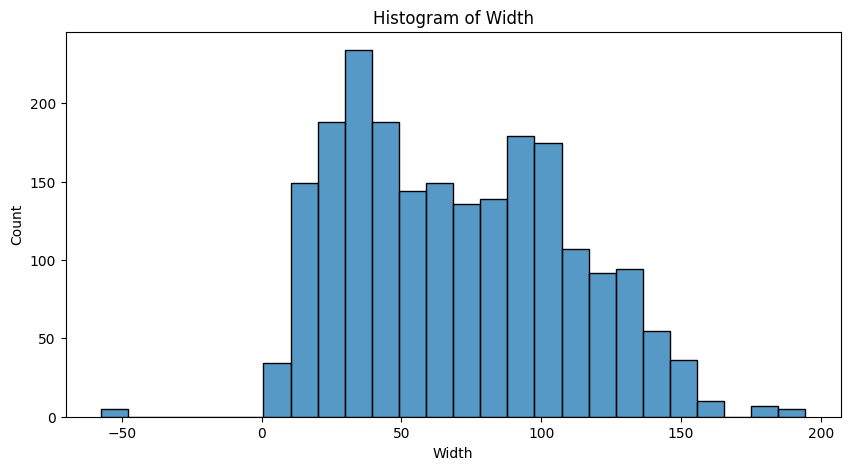

In [130]:
sns.histplot(df['Width'])
plt.title("Histogram of Width")
plt.show()

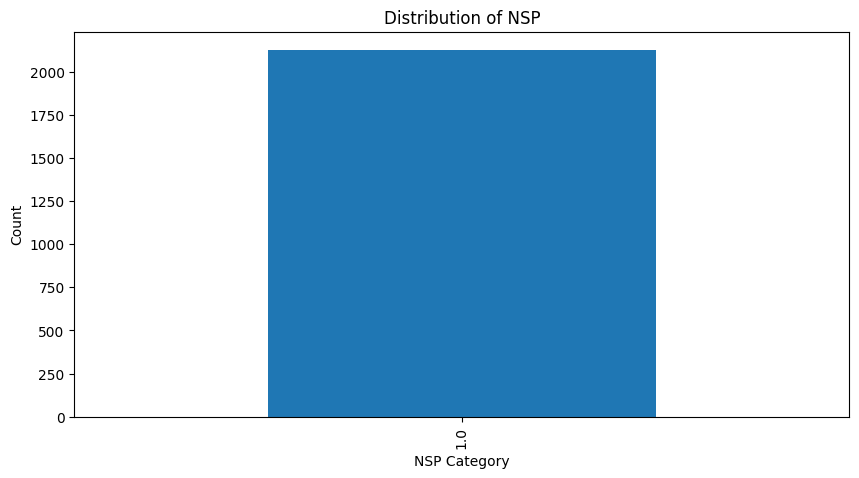

In [131]:
#Use bar charts or pie charts to display the frequency of categories for categorical variables.
df['NSP'].value_counts().plot(kind='bar')
plt.title("Distribution of NSP")
plt.xlabel("NSP Category")
plt.ylabel("Count")
plt.show()

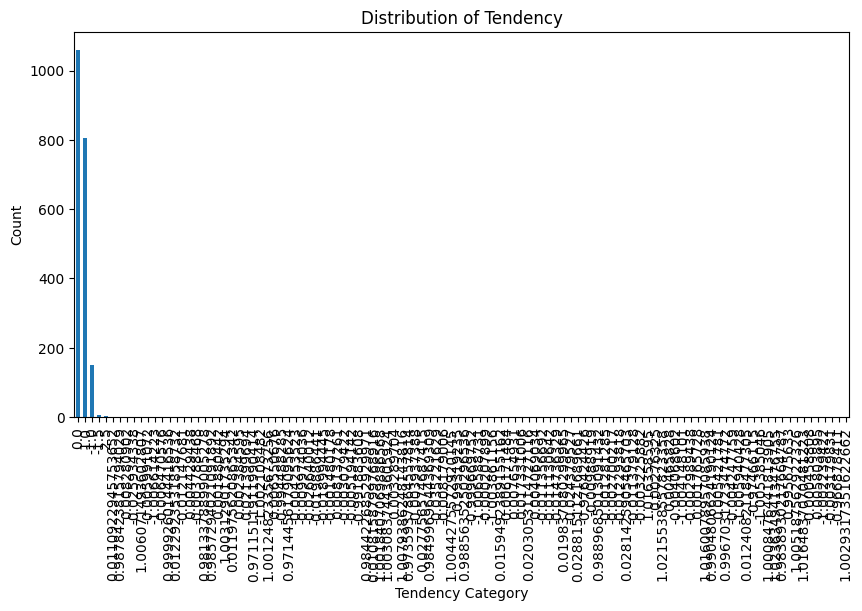

In [132]:
df['Tendency'].value_counts().plot(kind='bar')
plt.title("Distribution of Tendency")
plt.xlabel("Tendency Category")
plt.ylabel("Count")
plt.show()

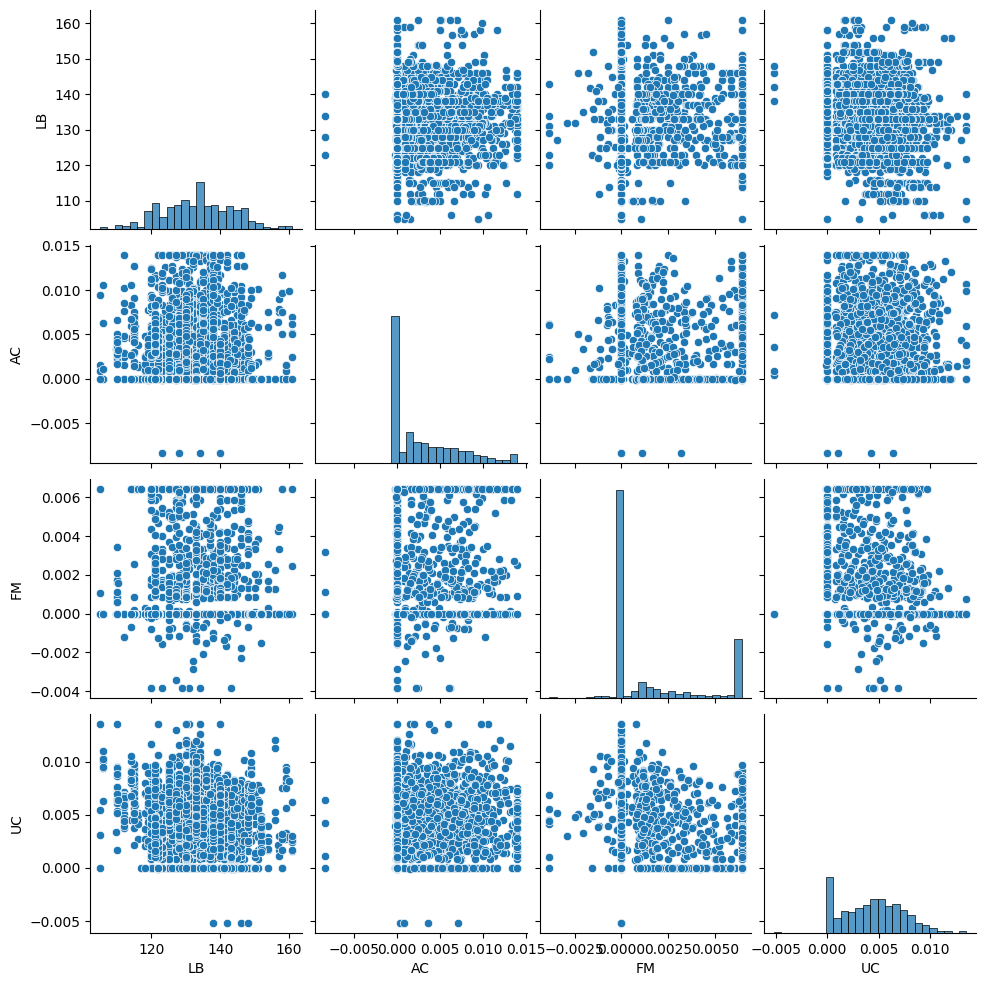

In [133]:
#Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.
sns.pairplot(df[['LB', 'AC', 'FM', 'UC']], height=2.5)

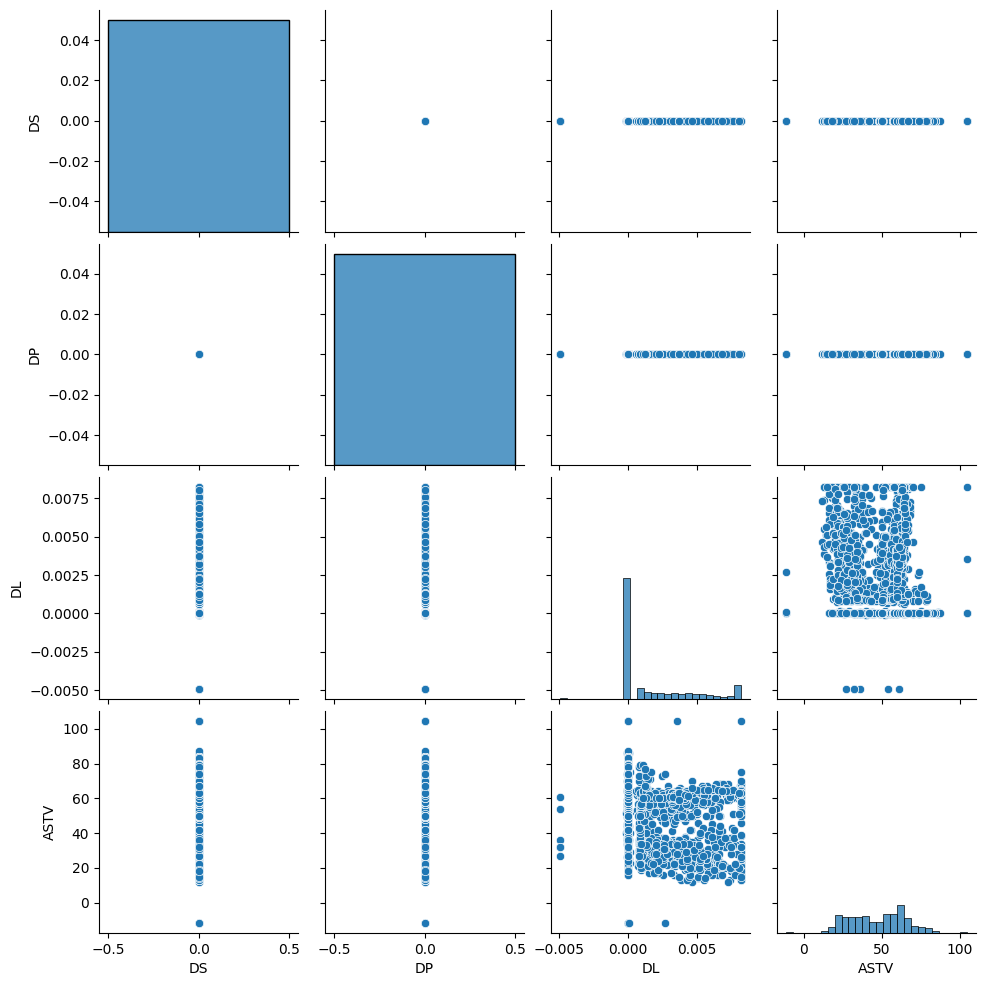

In [134]:
sns.pairplot(df[['DS', 'DP', 'DL', 'ASTV']], height=2.5)

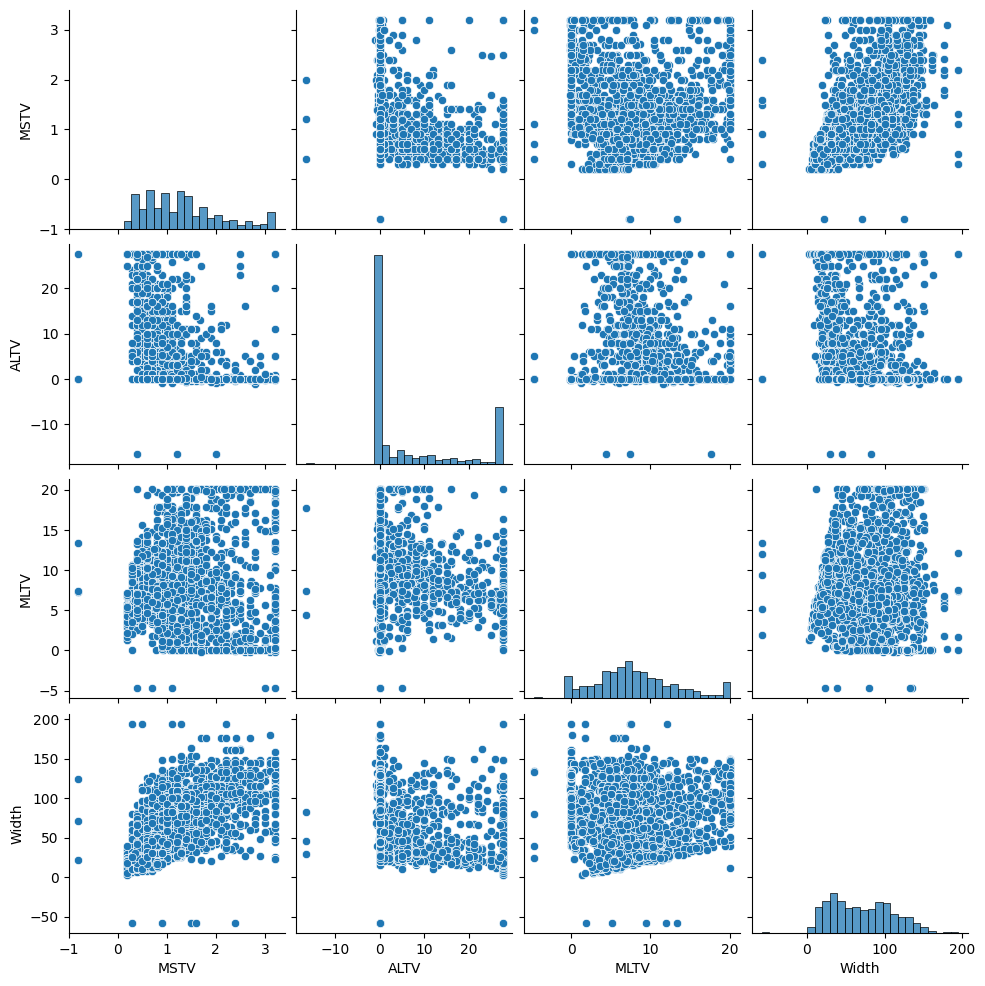

In [135]:
sns.pairplot(df[['MSTV', 'ALTV', 'MLTV', 'Width']], height=2.5)

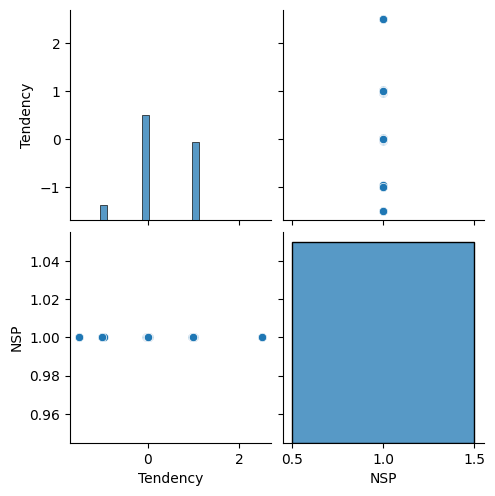

In [136]:
sns.pairplot(df[['Tendency', 'NSP']], height=2.5)

<Axes: >

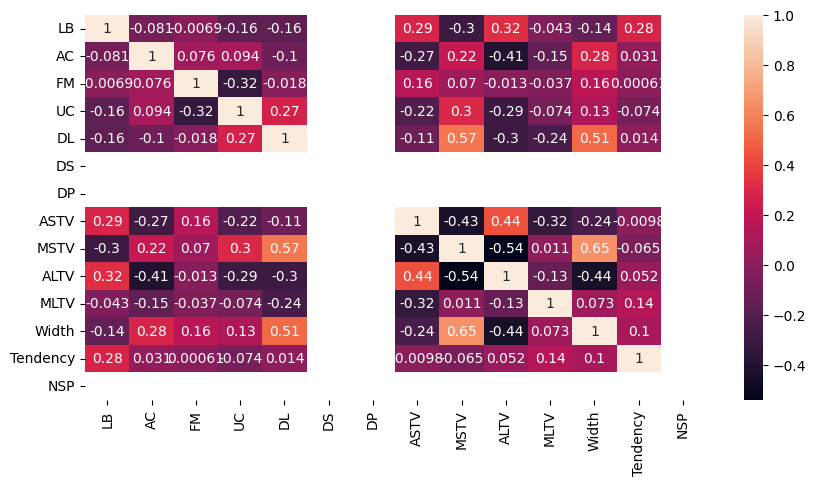

In [137]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

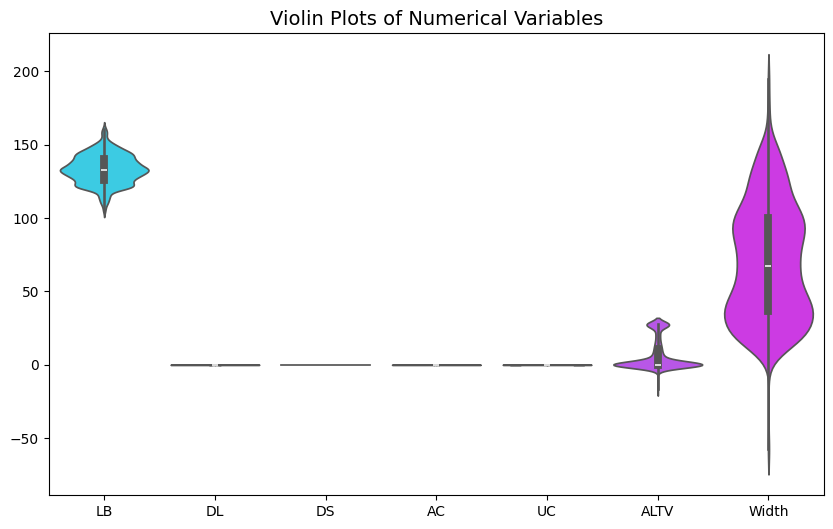

In [140]:
#Employ advanced visualization techniques like pair plots, or violin plots for deeper insights.
plt.figure(figsize=(10, 6))
sns.violinplot(data=df[['LB','DL','DS','AC', 'UC', 'ALTV', 'Width']], inner='box', palette='cool')
plt.title("Violin Plots of Numerical Variables", fontsize=14)
plt.show()

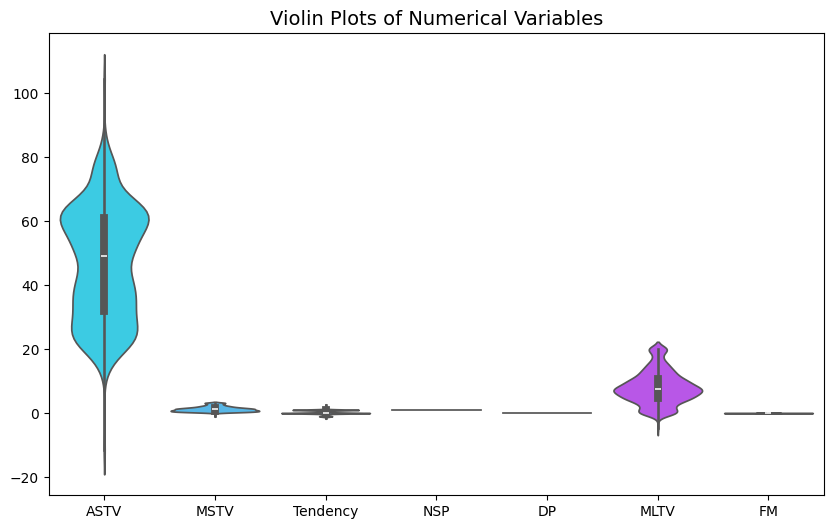

In [141]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df[['ASTV','MSTV','Tendency',"NSP",'DP','MLTV','FM']], inner='box', palette='cool')
plt.title("Violin Plots of Numerical Variables", fontsize=14)
plt.show()

## **4.	Pattern Recognition and Insights:**

In [ ]:
#Identify any correlations between variables and discuss their potential implications.



*   Most variables such as LB, AC, FM, UC, DL, DS, DP, and Tendency show weak correlations (< 0.3).

*   DL and MSTV (0.57), and DL and Width (0.51) have moderate positive correlations, indicating a relationship between deceleration length, signal variability, and width.

*   ASTV and MSTV (-0.43) show a negative correlation.

   

*   NSP has very weak correlation with all features, suggesting non-linear relationships.
*   Overall, no strong correlations are found, no strong multicollinearity exists, so all variables can be used for further analysis.




In [ ]:
#Look for trends or patterns over time if temporal data is available.



*   The dataset does not include any time or date column, so temporal trend analysis is not applicable.

*   As no time-based data is available, trends or patterns over time cannot be observed or visualized.




## **5.	Conclusion:**



*   The dataset was analyzed using statistical methods and visualization techniques to understand its structure and relationships.

*   Most variables are within a normal range after outlier treatment, and there no strong correlations were found among features.

*   As the dataset has no time or date column, temporal trend analysis is not applicable.

*   Overall, the data is clean, consistent, and ready for machine learning model development.


